In [ ]:
pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.1 MB/s eta 0:00:00


In [1]:
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import networkx as nx
import pylab as plt

ModuleNotFoundError: No module named 'pgmpy'

In [ ]:
model = DiscreteBayesianNetwork([('Guest', 'Host'), ('Price', 'Host')])

In [ ]:
cpd_guest = TabularCPD(variable='Guest', variable_card=3, values=[[0.33], [0.33], [0.34]])
cpd_price = TabularCPD(variable='Price', variable_card=3, values=[[0.33], [0.33], [0.34]])

cpd_host = TabularCPD(
    variable='Host',
    variable_card=3,
    values=[
        [0, 0, 0, 0, 0.5, 1, 0, 1, 0.5],
        [0.5, 0, 0, 0, 0, 0, 0, 0, 0.5],
        [0.5, 1, 1, 1, 0.5, 0, 1, 0, 0]
    ],
    evidence=['Guest', 'Price'],
    evidence_card=[3, 3]
)

In [ ]:
model.add_cpds(cpd_guest, cpd_price, cpd_host)
model.check_model()


True

In [ ]:
from pgmpy.inference import VariableElimination

In [ ]:
infer = VariableElimination(model)
posterior_p = infer.query(['Host'], evidence={'Guest': 2, 'Price': 2})
print(posterior_p)

+---------+-------------+
| Host    |   phi(Host) |
+=========+=============+
| Host(0) |      0.5000 |
+---------+-------------+
| Host(1) |      0.5000 |
+---------+-------------+
| Host(2) |      0.0000 |
+---------+-------------+


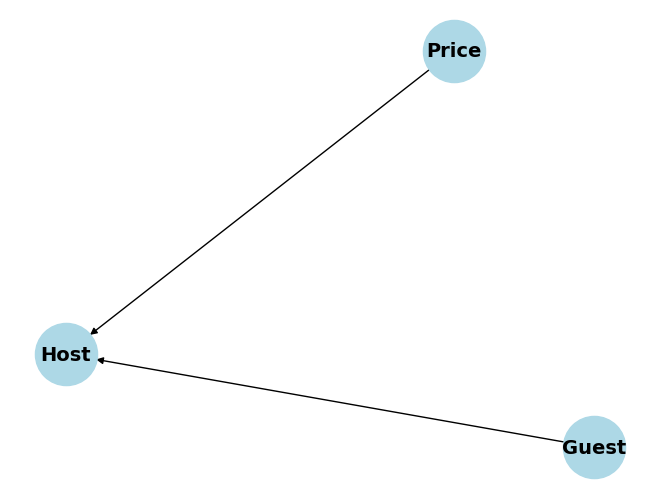

In [ ]:
G = nx.DiGraph(model.edges())

nx.draw(G, with_labels=True, node_size=2000, node_color='lightblue', font_size=14, font_weight='bold')
plt.savefig('model.png')



In [ ]:

plt.show()